In [ ]:
#IMPORT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#LOAD DATA
data = pd.read_csv('IMDb Movies India.csv', encoding='latin1')
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#DISPLAY FIRST FEW ROWS
print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Anga

In [ ]:
#BASIC INFO OF DATA
print("Basic information about the dataset:")
print(data.info())

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


In [ ]:
#SUMMARY STATISTICS
print("Summary Statistics of the DataSet:")
print(data.describe(include='all'))

Summary Statistics of the DataSet:
          Name    Year Duration  Genre       Rating Votes      Director  \
count    15509   14981     7240  13632  7919.000000  7920         14984   
unique   13838     102      182    485          NaN  2034          5938   
top     Anjaam  (2019)  120 min  Drama          NaN     8  Jayant Desai   
freq         7     410      240   2780          NaN   227            58   
mean       NaN     NaN      NaN    NaN     5.841621   NaN           NaN   
std        NaN     NaN      NaN    NaN     1.381777   NaN           NaN   
min        NaN     NaN      NaN    NaN     1.100000   NaN           NaN   
25%        NaN     NaN      NaN    NaN     4.900000   NaN           NaN   
50%        NaN     NaN      NaN    NaN     6.000000   NaN           NaN   
75%        NaN     NaN      NaN    NaN     6.800000   NaN           NaN   
max        NaN     NaN      NaN    NaN    10.000000   NaN           NaN   

            Actor 1 Actor 2 Actor 3  
count         13892   1312

In [ ]:
#CHECK MISSING VALUES:
print("Number of missing values per column:")
print(data.isnull().sum())

Number of missing values per column:
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


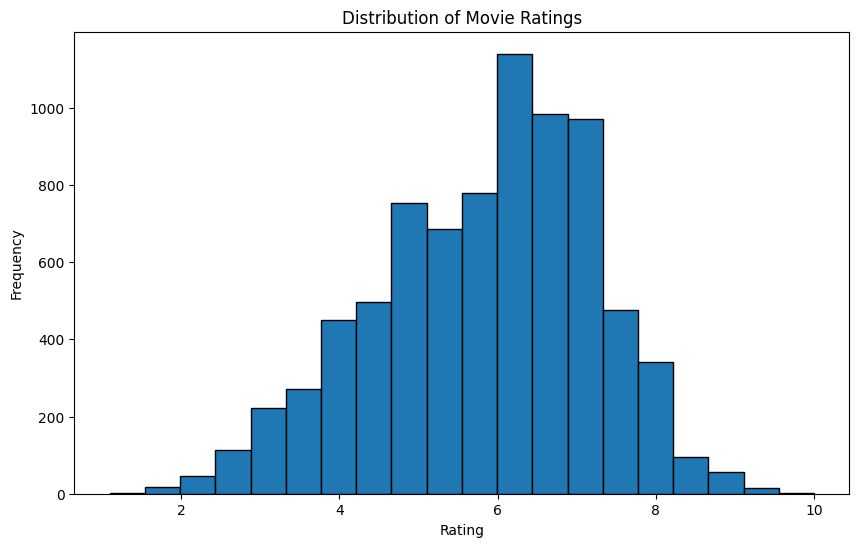

In [ ]:
#VISUALIZE
# Distribution of ratings
plt.figure(figsize=(10, 6))
plt.hist(data['Rating'].dropna(), bins=20, edgecolor='k')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#DATA PREPROCESSING
#HANDLE MISSING VALUES
data = data.dropna(subset=['Rating'])
# Remove commas from 'Rating' and convert to numeric
data.loc[:, 'Rating'] = data['Rating'].replace('[$,]', '', regex=True).astype(float)
# Convert 'Duration' to numeric
data.loc[:, 'Duration'] = data['Duration'].str.extract('(\d+)').astype(float)
# Fill or Drop remaining missing values
data = data.fillna({'Director': 'Unknown', 'Actor 1': 'Unknown', 'Actor 2': 'Unknown', 'Actor 3': 'Unknown'})

In [ ]:
#ENCODE CATEGORICAL VARIABLES
# Convert categorical columns to codes
categorical_columns = ['Director', 'Actor 1', 'Actor 2', 'Actor 3']
for col in categorical_columns:
    data[col] = data[col].astype('category').cat.codes

In [ ]:
#FEATURE ENGINEERING
genres = data['Genre'].str.get_dummies(sep=', ')
data = pd.concat([data, genres], axis=1).drop('Genre', axis=1)
data['Year'] = data['Year'].str.extract('(\d{4})').astype(float)
features = data.drop(['Name', 'Rating', 'Duration'], axis=1)
target = data['Rating']
# Ensure all features are numeric
features = features.apply(pd.to_numeric, errors='coerce')
# Drop rows with NaNs in features or target
features = features.dropna()
target = target[features.index]

In [ ]:
#SPLIT DATA
# Re-split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
#BUILDING AND TRAINING MODEL
#TRAIN THE MODEL
# LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
#EVALUATING MODEL
#MODEL PERFORMANCE
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.5084933030489804
R-squared: 0.17965979123953002


In [ ]:
#CROSS-VALIDATION
cv_scores = cross_val_score(model, features, target, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validated MSE: {-cv_scores.mean()}')

Cross-Validated MSE: 1.5049441448833458


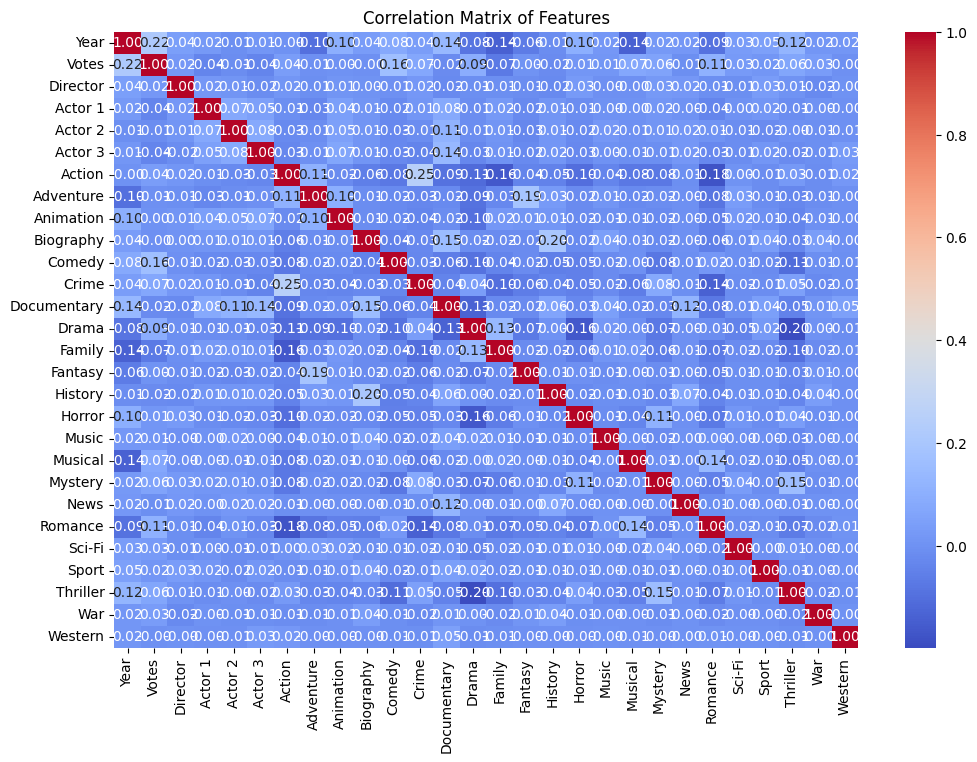

In [ ]:
#VISUALIZATION
#CORRELATION MATRIX
plt.figure(figsize=(12, 8))
sns.heatmap(features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()


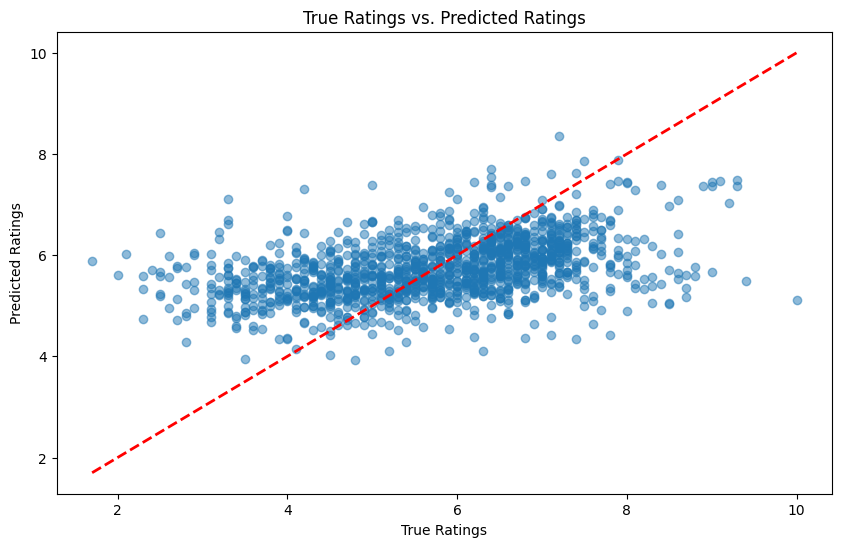

In [ ]:
#TRUE VS PREDICTED RATINGS
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('True Ratings vs. Predicted Ratings')
plt.xlabel('True Ratings')
plt.ylabel('Predicted Ratings')
plt.show()